Compare fixed ocean heat flux convergence in SOM simulations with heat transport in fully-coupled simulations

Visualize depth profiles of temperature

Visualize Southern Ocean MOC changes

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import nctoolkit as nct
import xarray
%matplotlib inline

import proplot as pplt

import cmocean
cmaps = cmocean.cm.cmap_d

nctoolkit is using Climate Data Operators version 1.9.9


In [5]:
pop_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/POP'
e_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM1.2/SOM'
cesm2_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2'

In [4]:
mask = xarray.open_dataset('/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM1.2/SOM/Pliocene_mask.nc')

### 1. Combined heat flux convergence and northward heat transport ###

In [6]:
# CESM2 qfluxes

qflux_plio = xarray.open_dataset('%s/POP/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.pop.h.QFLUX.110101-120012.192x288.nc' %(cesm2_dir))
qflux_plio_pi = xarray.open_dataset('%s/POP/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.pop.h.QFLUX.035101-040512.192x288.nc' %(cesm2_dir))
qflux_400 = xarray.open_dataset('%s/POP/b.e21.B1850.f09_g17.CMIP6-piControl.400.pop.h.QFLUX.081201-090212.192x288.nc' %(cesm2_dir))
qflux_pi = xarray.open_dataset('%s/POP/b.e21.B1850.f09_g17.CMIP6-piControl.001.pop.h.QFLUX.190001-200012.192x288.nc' %(cesm2_dir))

shf_plio = xarray.open_dataset('%s/POP/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.pop.h.SHF.110101-120012.192x288.nc' %(cesm2_dir))
shf_plio_pi = xarray.open_dataset('%s/POP/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.pop.h.SHF.035101-040512.192x288.nc' %(cesm2_dir))
shf_400 = xarray.open_dataset('%s/POP/b.e21.B1850.f09_g17.CMIP6-piControl.400.pop.h.SHF.081201-090212.192x288.nc' %(cesm2_dir))
shf_pi = xarray.open_dataset('%s/POP/b.e21.B1850.f09_g17.CMIP6-piControl.001.pop.h.SHF.190001-200012.192x288.nc' %(cesm2_dir))

#cesm2 SOM qflx files
qdp_pi_cesm2 = xarray.open_dataset('%s/SOM/PLIO_PIoceanmixed_ice_zeros_CESM2_remap.nc' %(cesm2_dir))
qdp_plio_280 = xarray.open_dataset('%s/SOM/PLIO_cesm2_280_oceanmixed_ice_remap.nc' %(cesm2_dir))
qdp_pi_SOasFCM = xarray.open_dataset('%s/SOM/CESM2_PlioPIoceanmixed_ice_SOasFCM_BC_remap.nc' %(cesm2_dir))

In [7]:
nheat_pi = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.001.pop.h.N_HEAT.190001-200012.nc' %(pop_dir))
nheat_plio = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.pop.h.N_HEAT.110101-120012.nc' %(pop_dir))
nheat_plio_280 = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.pop.h.N_HEAT.035101-040512.nc' %(pop_dir))
nheat_400 = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.400.pop.h.N_HEAT.081201-090212.nc' %(pop_dir))

In [8]:

moc_plio_280 = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.pop.h.MOC.035101-040512.nc' %(pop_dir))
temp_plio_280 = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.pop.h.TEMP.035101-040512.192x288.ann.nc' %(pop_dir))

In [9]:
qdp_pi_cesm2 = qdp_pi_cesm2.rename(ni='lon',nj='lat')
qdp_plio_280 = qdp_plio_280.rename(ni='lon',nj='lat')
qdp_pi_SOasFCM = qdp_pi_SOasFCM.rename(ni='lon',nj='lat')

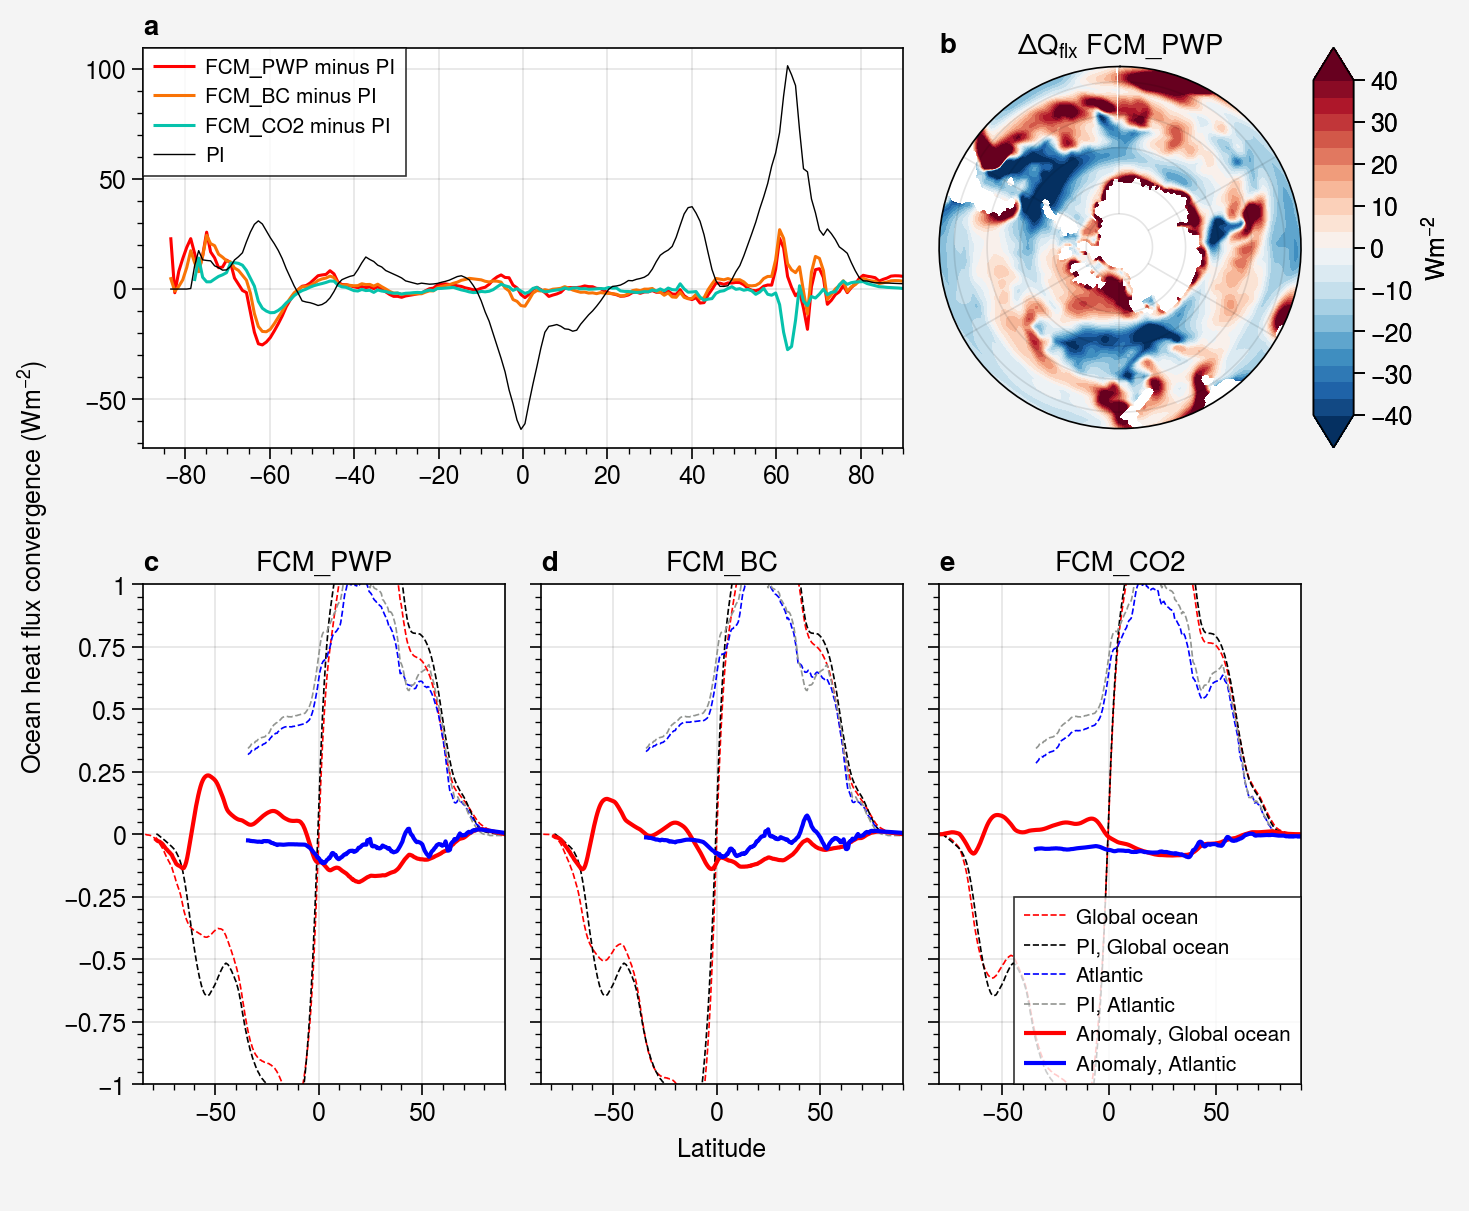

In [60]:
gs = pplt.GridSpec(ncols=3, nrows=2, wratios=(1, 1, 1), hratios=(1.2, 1.5))
fig = pplt.figure(refwidth=3.8, refheight=2)

plt.rc('legend',fontsize='small')

Plio_qflx = shf_plio.SHF.mean(('lon','time')) + qflux_plio.QFLUX.mean(('lon','time'))
Plio_pi_qflx = shf_plio_pi.SHF.mean(('lon','time')) + qflux_plio_pi.QFLUX.mean(('lon','time'))
CO2_qflx = shf_400.SHF.mean(('lon','time')) + qflux_400.QFLUX.mean(('lon','time'))

Pi_qflx = qdp_pi_cesm2.qdp.mean(('lon','time'))

lat = qdp_pi_cesm2['lat']

ax1 = fig.subplot(gs[0, :2])

ax1.plot(lat, -(Plio_qflx-Pi_qflx), color='red', linewidth=1.1, label='FCM_PWP minus PI')
ax1.plot(lat, -(Plio_pi_qflx-Pi_qflx), color='orange', linewidth=1.1, label='FCM_BC minus PI')
ax1.plot(lat, -(CO2_qflx - Pi_qflx), color='turquoise', lw=1.1, label='FCM_CO2 minus PI')
ax1.plot(lat, -Pi_qflx, color='black', linewidth=0.5, label='PI')
ax1.set_xlabel('Latitude')
ax1.legend(ncols=1)

ax2 = fig.add_subplot(gs[0, 2], proj='spaeqd')

Plio_qflx = shf_plio.SHF.mean(('time')) + qflux_plio.QFLUX.mean(('time'))
Plio_pi_qflx = shf_plio_pi.SHF.mean(('time')) + qflux_plio_pi.QFLUX.mean(('time'))
CO2_qflx = shf_400.SHF.mean(('time')) + qflux_400.QFLUX.mean(('time'))

qflux_diff = [Plio_qflx-Pi_qflx, Plio_pi_qflx-Pi_qflx, CO2_qflx - Pi_qflx]
titles = ['\u0394$Q_\mathrm{flx}$ FCM_PWP', '\u0394$Q_\mathrm{flx}$ FCM_BC',
         '\u0394$Q_\mathrm{flx}$ FCM_CO$_2$']

cp = ax2.contourf(-qflux_diff[0], N=np.linspace(-40,40,21), extend='both')
ax2.format(boundinglat=-35)
ax2.set_title(titles[0])
    
ax2.colorbar(cp, label=('Wm$^{-2}$'), ticks=10)

ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

ax3.plot(nheat_plio.N_HEAT.mean(dim='time')[0,0,:], color='red', linewidth=0.6, linestyle='dashed', label='Pliocene: Global ocean') # total
ax3.plot(nheat_pi.N_HEAT.mean(dim='time')[0,0,:], color='black', linewidth=0.6, linestyle='dashed', label='PI: Global ocean')

ax3.plot(nheat_plio.N_HEAT.mean(dim='time')[1,1,:], color='blue', linewidth=0.6, linestyle='dashed', label='Pliocene: Atlantic')
ax3.plot(nheat_pi.N_HEAT.mean(dim='time')[1,1,:], color='gray', linewidth=0.6, linestyle='dashed', label='PI: Atlantic') #eulearn mean

ax3.plot((nheat_plio.N_HEAT.mean(dim='time')[0,0,:] - nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='red', label='Plio minus PI: Global ocean')
ax3.plot((nheat_plio.N_HEAT.mean(dim='time')[1,1,:] - nheat_pi.N_HEAT.mean(dim='time')[1,1,:]), color='blue', label='Plio minus PI: Atlantic')

#ax[0].legend(loc='upper left', ncols=1, fontsize=7)

ax3.set_title('FCM_PWP')

ax4.plot(nheat_plio_280.N_HEAT.mean(dim='time')[0,0,:], color='red', linewidth=0.6, linestyle='dashed', label='400ppm: Global ocean') # total
ax4.plot(nheat_pi.N_HEAT.mean(dim='time')[0,0,:], color='black', linewidth=0.6, linestyle='dashed', label='PI: Global ocean')

ax4.plot(nheat_plio_280.N_HEAT.mean(dim='time')[1,1,:], color='blue', linewidth=0.6, linestyle='dashed', label='400ppm: Atlantic')
ax4.plot(nheat_pi.N_HEAT.mean(dim='time')[1,1,:], color='gray', linewidth=0.6, linestyle='dashed', label='PI: Atlantic') #eulearn mean

ax4.plot((nheat_plio_280.N_HEAT.mean(dim='time')[0,0,:] - nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='red', label='Plio minus PI: Global ocean')
ax4.plot((nheat_plio_280.N_HEAT.mean(dim='time')[1,1,:] - nheat_pi.N_HEAT.mean(dim='time')[1,1,:]), color='blue', label='Plio minus PI: Atlantic')
ax4.set_title('FCM_BC')
#ax[1].legend(loc='upper left', ncols=1, fontsize=7)

ax5.plot(nheat_400.N_HEAT.mean(dim='time')[0,0,:], color='red', linewidth=0.6, linestyle='dashed', label='Global ocean') # total
ax5.plot(nheat_pi.N_HEAT.mean(dim='time')[0,0,:], color='black', linewidth=0.6, linestyle='dashed', label='PI, Global ocean')

ax5.plot(nheat_400.N_HEAT.mean(dim='time')[1,1,:], color='blue', linewidth=0.6, linestyle='dashed', label='Atlantic')
ax5.plot(nheat_pi.N_HEAT.mean(dim='time')[1,1,:], color='gray', linewidth=0.6, linestyle='dashed', label='PI, Atlantic') #eulearn mean

ax5.plot((nheat_400.N_HEAT.mean(dim='time')[0,0,:] - nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='red', label='Anomaly, Global ocean')
ax5.plot((nheat_400.N_HEAT.mean(dim='time')[1,1,:] - nheat_pi.N_HEAT.mean(dim='time')[1,1,:]), color='blue', label='Anomaly, Atlantic')

ax5.legend(ncols=1, loc='lower right')
ax5.set_title('FCM_CO2')

axs = fig.subplotgrid


axs[0:2].format(xlabel = 'Latitude')
axs[3:].format(xlabel = 'Latitude')

axs[0:3].format(ylabel = 'Ocean heat flux convergence (Wm$^{-2}$)')
axs[3:].format(ylabel = 'Meridional OHT (PW)')

ax5.set_ylim(-1,1)

fig.align_labels()

axs.format(abc=True)

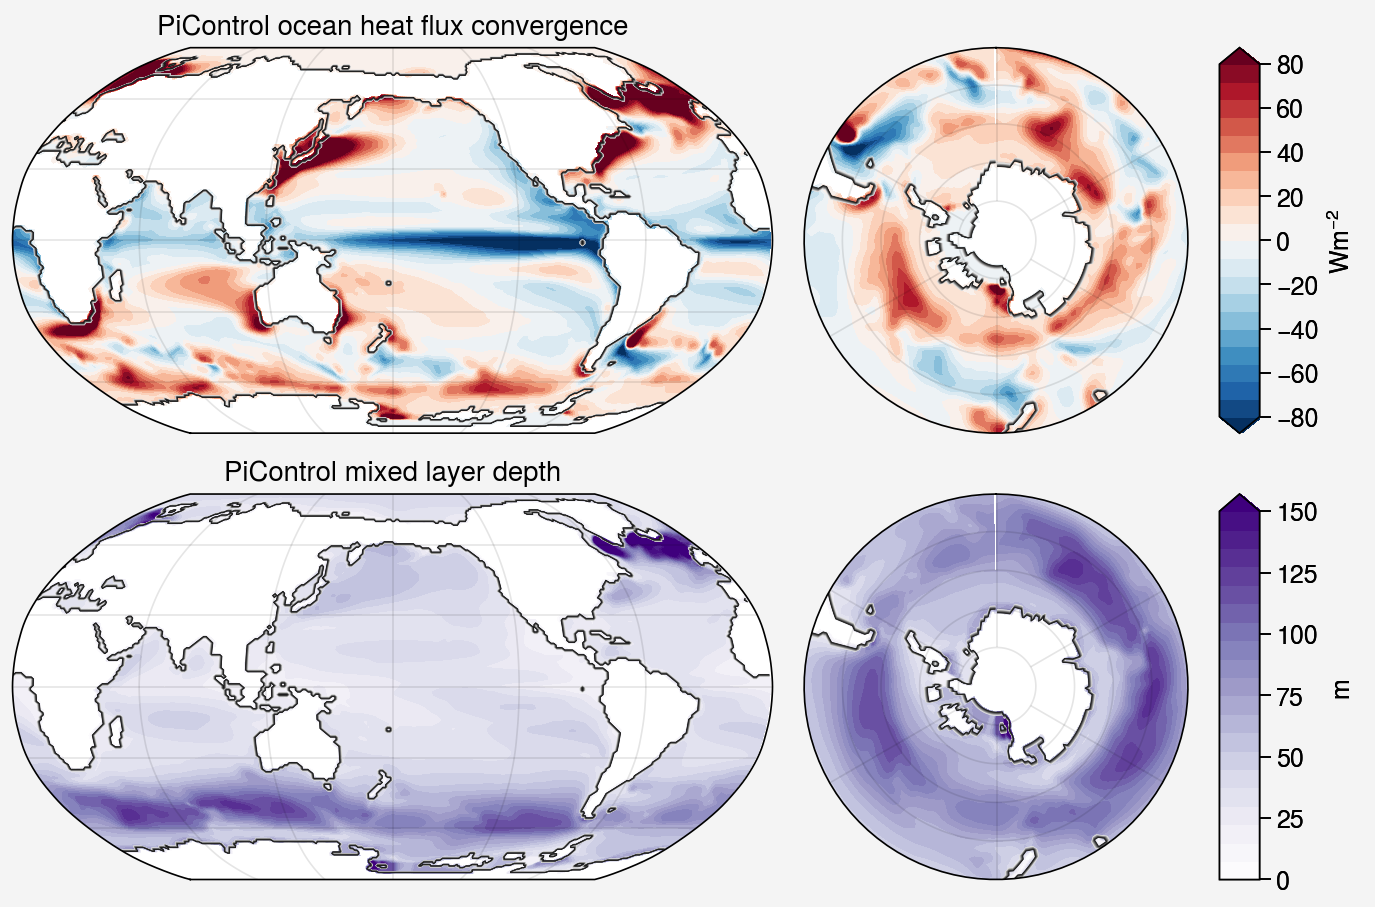

In [21]:
gs = pplt.GridSpec(ncols=2, nrows=2, wratios=(1.7, 1))
fig = pplt.figure(refwidth=3.8)

plt.rc('legend',fontsize='small')

Pi_qflx = qdp_pi_cesm2.qdp.mean(('time'))
Pi_hblt = qdp_pi_cesm2.hblt.mean(('time'))

lon = qdp_pi_cesm2['lon']
lat = qdp_pi_cesm2['lat']

ax1 = fig.subplot(gs[0, 0], proj='robin', proj_kw={'lon_0': 180})

ax1.contourf(lon, lat, -Pi_qflx, N=np.linspace(-80,80,21), extend='both')
ax1.contour(mask.mask, linewidth=0.3, cmap='black')

ax2 = fig.add_subplot(gs[0, 1], proj='spaeqd')

cp = ax2.contourf(lon, lat, -Pi_qflx, N=np.linspace(-80,80,21), extend='both')
ax2.format(boundinglat=-40)
ax2.contour(mask.mask, linewidth=0.3, cmap='black')
    
ax2.colorbar(cp, label=('Wm$^{-2}$'), ticks=20)


ax1 = fig.subplot(gs[1, 0], proj='robin', proj_kw={'lon_0': 180})

ax1.contourf(lon, lat, Pi_hblt,  N=np.linspace(0,150,21), extend='max', cmap='purples')
ax1.contour(mask.mask, linewidth=0.3, cmap='black')

ax2 = fig.add_subplot(gs[1, 1], proj='spaeqd')

cp = ax2.contourf(lon, lat, Pi_hblt, N=np.linspace(0,150,21), extend='max', cmap='purples')
ax2.format(boundinglat=-40)
ax2.contour(mask.mask, linewidth=0.3, cmap='black')
    
ax2.colorbar(cp, label=('m'), ticks=25)

axs = fig.subplotgrid

axs[0,0].format(title='PiControl ocean heat flux convergence')
axs[1,0].format(title='PiControl mixed layer depth')
#plt.savefig('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/figures/qflx_PI.pdf');

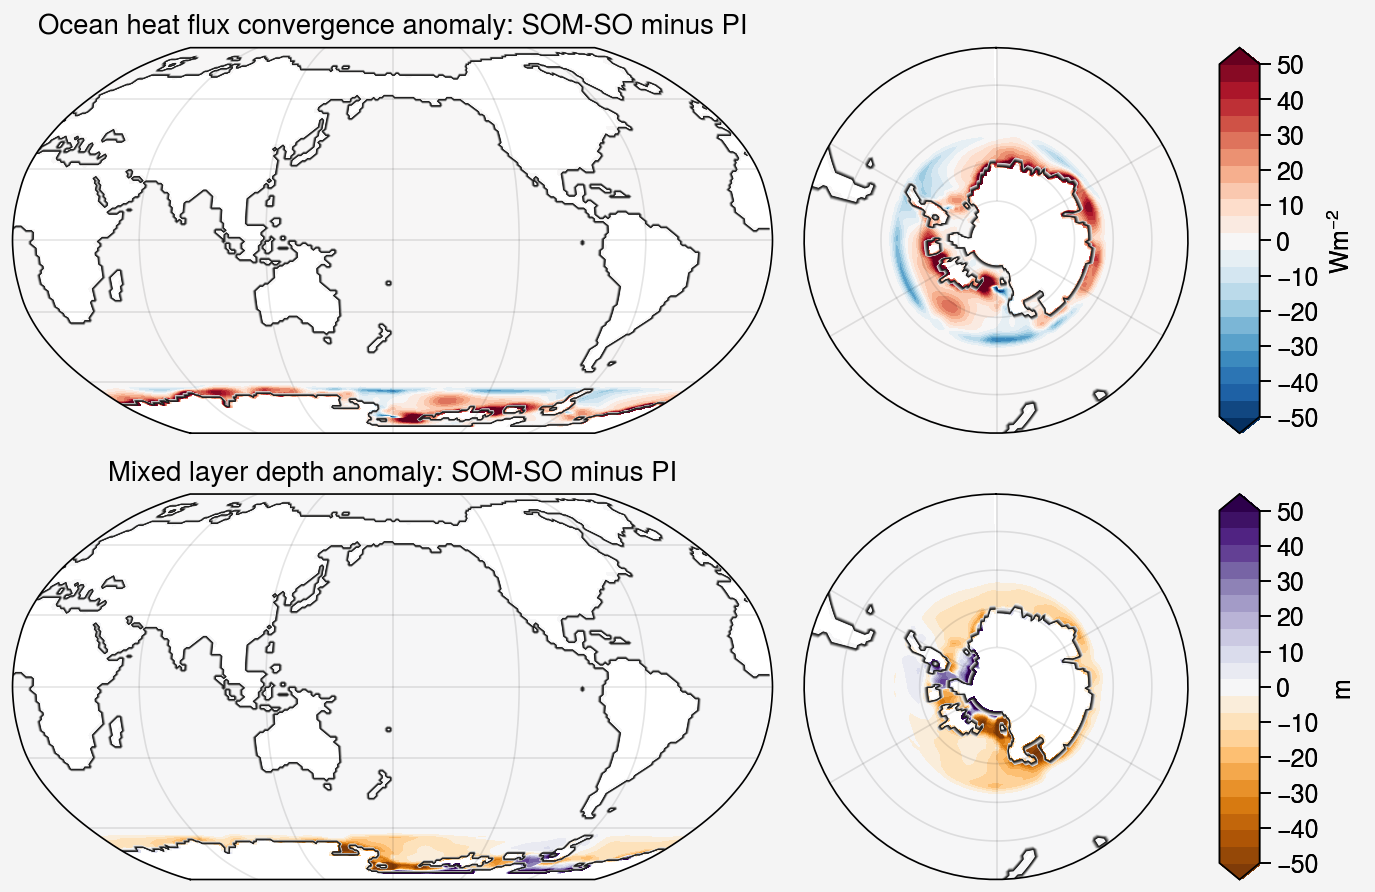

In [22]:
gs = pplt.GridSpec(ncols=2, nrows=2, wratios=(1.7, 1))
fig = pplt.figure(refwidth=3.8)

plt.rc('legend',fontsize='small')

SO_qflx = qdp_pi_SOasFCM.qdp.mean(('time')) - qdp_pi_cesm2.qdp.mean(('time'))
SO_hblt = qdp_pi_SOasFCM.hblt.mean(('time')) - qdp_pi_cesm2.hblt.mean(('time'))

lon = qdp_pi_SOasFCM['lon']
lat = qdp_pi_SOasFCM['lat']

ax1 = fig.subplot(gs[0, 0], proj='robin', proj_kw={'lon_0': 180})

ax1.contourf(lon, lat, -SO_qflx, N=np.linspace(-50,50,22), extend='both', cmap='BuRd')
ax1.contour(mask.mask, linewidth=0.3, cmap='black')

ax2 = fig.subplot(gs[0, 1], proj='spaeqd')

cp = ax2.contourf(lon, lat, -SO_qflx, N=np.linspace(-50,50,22), extend='both', cmap='BuRd')
ax2.format(boundinglat=-40)
ax2.contour(mask.mask, linewidth=0.3, cmap='black')
    
ax2.colorbar(cp, label=('Wm$^{-2}$'), ticks=10)

ax3 = fig.subplot(gs[1, 0], proj='robin', proj_kw={'lon_0': 180})

cp2 = ax3.contourf(lon, lat, SO_hblt, N=np.linspace(-50,50,22), extend='both', cmap='PuOr')
ax3.contour(mask.mask, linewidth=0.3, cmap='black')

ax4 = fig.subplot(gs[1, 1], proj='spaeqd')

cp = ax4.contourf(lon, lat, SO_hblt, N=np.linspace(-50,50,22), extend='both', cmap='PuOr')
ax4.format(boundinglat=-40)
ax4.contour(mask.mask, linewidth=0.3, cmap='black')
 

ax4.colorbar(cp2, label=('m'), ticks=10)

axs = fig.subplotgrid

axs[0,0].format(title = 'Ocean heat flux convergence anomaly: SOM-SO minus PI')
axs[1,0].format(title = 'Mixed layer depth anomaly: SOM-SO minus PI')
#ax3.set_title('Mixed layer depth anomaly: SOM-SO minus PI')

#plt.savefig('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/figures/qflx_SOasFCM.pdf');

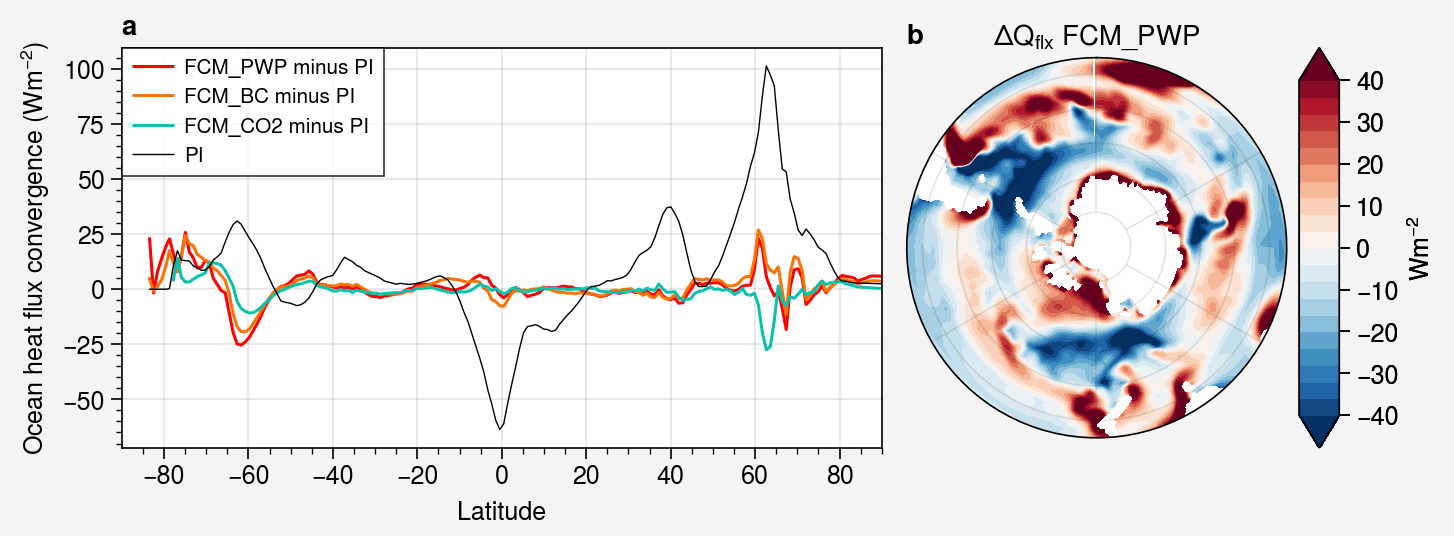

In [9]:
gs = pplt.GridSpec(ncols=3, nrows=1, wratios=(1, 1, 1))
fig = pplt.figure(refwidth=3.8, refheight=2, sharex=False, sharey=True)

plt.rc('legend',fontsize='small')

Plio_qflx = shf_plio.SHF.mean(('lon','time')) + qflux_plio.QFLUX.mean(('lon','time'))
Plio_pi_qflx = shf_plio_pi.SHF.mean(('lon','time')) + qflux_plio_pi.QFLUX.mean(('lon','time'))
CO2_qflx = shf_400.SHF.mean(('lon','time')) + qflux_400.QFLUX.mean(('lon','time'))

Pi_qflx = qdp_pi_cesm2.qdp.mean(('lon','time'))

lat = qdp_pi_cesm2['lat']

ax1 = fig.subplot(gs[:2])

ax1.plot(lat, -(Plio_qflx-Pi_qflx), color='red', linewidth=1.1, label='FCM_PWP minus PI')
ax1.plot(lat, -(Plio_pi_qflx-Pi_qflx), color='orange', linewidth=1.1, label='FCM_BC minus PI')
ax1.plot(lat, -(CO2_qflx - Pi_qflx), color='turquoise', lw=1.1, label='FCM_CO2 minus PI')
ax1.plot(lat, -Pi_qflx, color='black', linewidth=0.5, label='PI')
ax1.set_xlabel('Latitude')
ax1.legend(ncols=1)

ax2 = fig.add_subplot(gs[2], projection='spaeqd')

Plio_qflx = shf_plio.SHF.mean(('time')) + qflux_plio.QFLUX.mean(('time'))
Plio_pi_qflx = shf_plio_pi.SHF.mean(('time')) + qflux_plio_pi.QFLUX.mean(('time'))
CO2_qflx = shf_400.SHF.mean(('time')) + qflux_400.QFLUX.mean(('time'))

qflux_diff = [Plio_qflx-Pi_qflx, Plio_pi_qflx-Pi_qflx, CO2_qflx - Pi_qflx]
titles = ['\u0394$Q_\mathrm{flx}$ FCM_PWP', '\u0394$Q_\mathrm{flx}$ FCM_BC',
         '\u0394$Q_\mathrm{flx}$ FCM_CO$_2$']

cp = ax2.contourf(-qflux_diff[0], N=np.linspace(-40,40,21), extend='both')
ax2.format(boundinglat=-35)
ax2.set_title(titles[0])
    
ax2.colorbar(cp, label=('Wm$^{-2}$'), ticks=10)

ax1.format(ylabel = 'Ocean heat flux convergence (Wm$^{-2}$)')

axs = fig.subplotgrid

axs.format(abc=True)

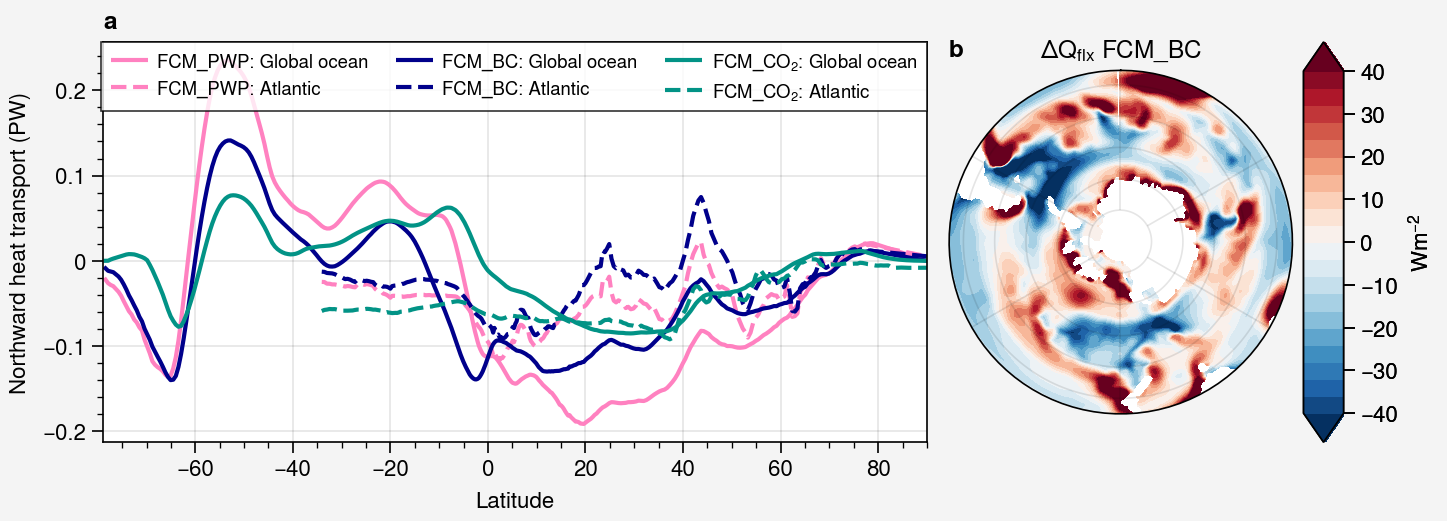

In [18]:
gs = pplt.GridSpec(ncols=3, nrows=1, wratios=(1.2, 1.2, 1))
fig = pplt.figure(refwidth=4.12, refheight=2, sharex=False, sharey=True)

plt.rc('legend',fontsize='small')

Plio_qflx = shf_plio.SHF.mean(('lon','time')) + qflux_plio.QFLUX.mean(('lon','time'))
Plio_pi_qflx = shf_plio_pi.SHF.mean(('lon','time')) + qflux_plio_pi.QFLUX.mean(('lon','time'))
CO2_qflx = shf_400.SHF.mean(('lon','time')) + qflux_400.QFLUX.mean(('lon','time'))

Pi_qflx = qdp_pi_cesm2.qdp.mean(('lon','time'))

lat = qdp_pi_cesm2['lat']

ax1 = fig.subplot(gs[:2])

ax1.plot((nheat_plio.N_HEAT.mean(dim='time')[0,0,:] - nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='pink', label='FCM_PWP: Global ocean')
ax1.plot((nheat_plio.N_HEAT.mean(dim='time')[1,1,:] - nheat_pi.N_HEAT.mean(dim='time')[1,1,:]), 
           linestyle='dashed', color='pink', label='FCM_PWP: Atlantic')
ax1.set_ylabel('Meridional OHT anomaly (PW)')
ax1.plot((nheat_plio_280.N_HEAT.mean(dim='time')[0,0,:] - nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='darkblue', 
           label='FCM_BC: Global ocean')
ax1.plot((nheat_plio_280.N_HEAT.mean(dim='time')[1,1,:] - nheat_pi.N_HEAT.mean(dim='time')[1,1,:]), 
           linestyle='dashed', color='darkblue', 
           label='FCM_BC: Atlantic')

ax1.plot((nheat_400.N_HEAT.mean(dim='time')[0,0,:] - nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='teal', 
           label='FCM_CO$_2$: Global ocean')
ax1.plot((nheat_400.N_HEAT.mean(dim='time')[1,1,:] - nheat_pi.N_HEAT.mean(dim='time')[1,1,:]), linestyle='dashed', color='teal', 
           label='FCM_CO$_2$: Atlantic')

ax1.legend(order='F')
ax1.set_xlabel('Latitude')
#ax1.legend(ncols=1)

ax2 = fig.add_subplot(gs[2], projection='spaeqd')

Plio_qflx = shf_plio.SHF.mean(('time')) + qflux_plio.QFLUX.mean(('time'))
Plio_pi_qflx = shf_plio_pi.SHF.mean(('time')) + qflux_plio_pi.QFLUX.mean(('time'))
CO2_qflx = shf_400.SHF.mean(('time')) + qflux_400.QFLUX.mean(('time'))

qflux_diff = [Plio_qflx-Pi_qflx, Plio_pi_qflx-Pi_qflx, CO2_qflx - Pi_qflx]
titles = ['\u0394$Q_\mathrm{flx}$ FCM_PWP', '\u0394$Q_\mathrm{flx}$ FCM_BC',
         '\u0394$Q_\mathrm{flx}$ FCM_CO$_2$']

cp = ax2.contourf(-qflux_diff[1], N=np.linspace(-40,40,21), extend='both')
ax2.format(boundinglat=-35)
ax2.set_title(titles[1])
    
ax2.colorbar(cp, label=('Wm$^{-2}$'), ticks=10)

ax1.format(ylabel = 'Northward heat transport (PW)')

axs = fig.subplotgrid

axs.format(abc=True)

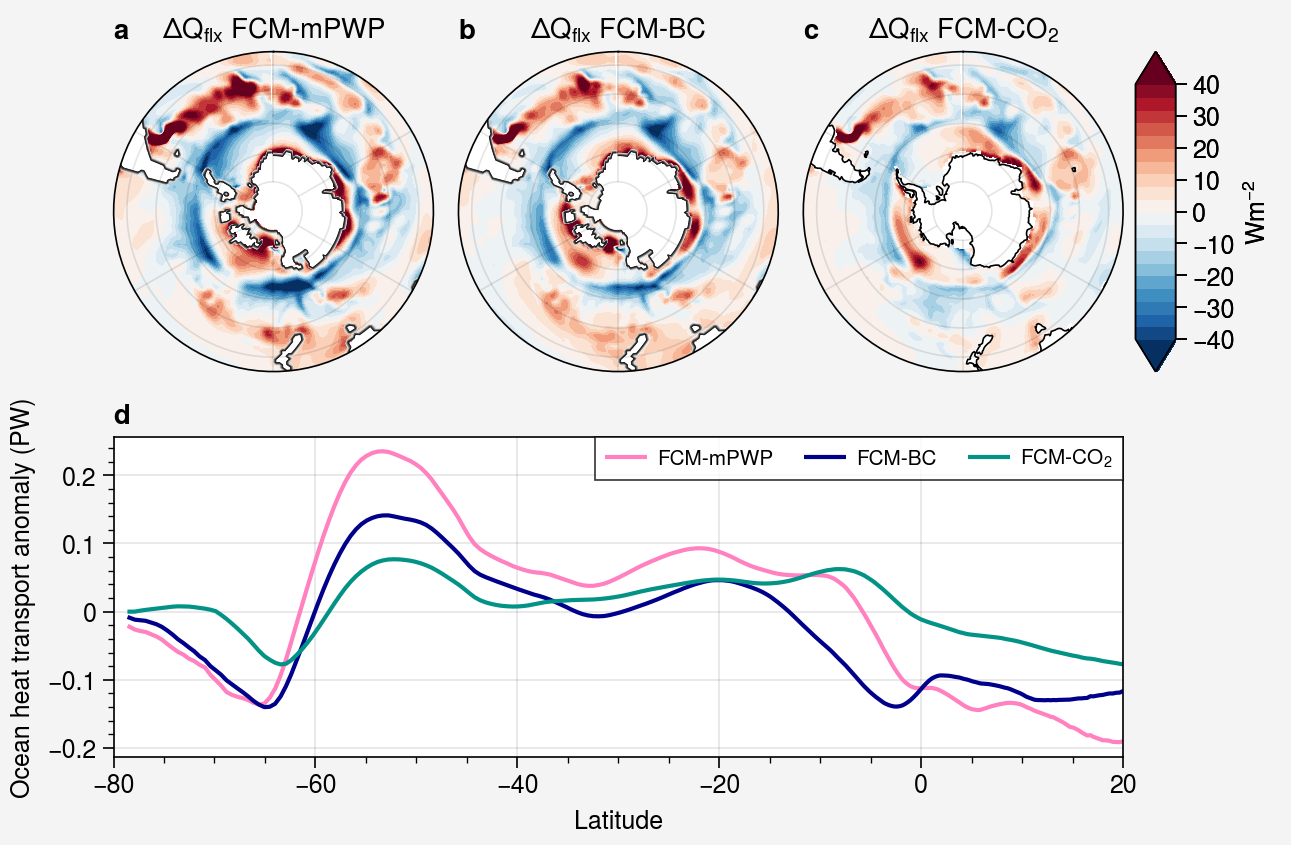

In [18]:
gs = pplt.GridSpec(ncols=3, nrows=2, wratios=(1, 1, 1))
fig = pplt.figure(refwidth=1.6, refheight=1.6, sharex=False, sharey=True)

plt.rc('legend',fontsize='small')

Plio_qflx = shf_plio.SHF.mean(('lon','time')) + qflux_plio.QFLUX.mean(('lon','time'))
Plio_pi_qflx = shf_plio_pi.SHF.mean(('lon','time')) + qflux_plio_pi.QFLUX.mean(('lon','time'))
CO2_qflx = shf_400.SHF.mean(('lon','time')) + qflux_400.QFLUX.mean(('lon','time'))

Pi_qflx = qdp_pi_cesm2.qdp.mean(('time'))

lat = qdp_pi_cesm2['lat']


#ax1.legend(ncols=1)

ax1 = fig.add_subplot(gs[0], projection='spaeqd')
ax2 = fig.add_subplot(gs[1], projection='spaeqd')
ax3 = fig.add_subplot(gs[2], projection='spaeqd')

Plio_qflx = shf_plio.SHF.mean(('time')) + qflux_plio.QFLUX.mean(('time'))
Plio_pi_qflx = shf_plio_pi.SHF.mean(('time')) + qflux_plio_pi.QFLUX.mean(('time'))
CO2_qflx = shf_400.SHF.mean(('time')) + qflux_400.QFLUX.mean(('time'))

qflux_diff = [Plio_qflx-Pi_qflx, Plio_pi_qflx-Pi_qflx, CO2_qflx - Pi_qflx]
titles = ['\u0394$Q_\mathrm{flx}$ FCM-mPWP', '\u0394$Q_\mathrm{flx}$ FCM-BC',
         '\u0394$Q_\mathrm{flx}$ FCM-CO$_2$']

# cp = ax1.contourf(-qflux_diff[0], N=np.linspace(-40,40,21), extend='both')
# ax2.contourf(-qflux_diff[1], N=np.linspace(-40,40,21), extend='both')
# ax3.contourf(-qflux_diff[2], N=np.linspace(-40,40,21), extend='both')

for i,ax in enumerate((ax1, ax2, ax3)):   
    cp = ax.contourf(-qflux_diff[i], N=np.linspace(-40,40,21), extend='both')
    ax.format(boundinglat=-35)
    ax.set_title(titles[i])
    
ax1.contour(mask.mask, cmap='black', linewidth=0.3)
ax2.contour(mask.mask, cmap='black', linewidth=0.3)
ax3.coastlines()
ax3.colorbar(cp, label=('Wm$^{-2}$'), ticks=10)


ax4 = fig.subplot(gs[3:])

ax4.plot((nheat_plio.N_HEAT.mean(dim='time')[0,0,:] - 
          nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='pink', label='FCM-mPWP')
ax4.set_ylabel('Meridional OHT anomaly (PW)')
ax4.plot((nheat_plio_280.N_HEAT.mean(dim='time')[0,0,:] - 
          nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='darkblue', 
         label='FCM-BC')

ax4.plot((nheat_400.N_HEAT.mean(dim='time')[0,0,:] - 
          nheat_pi.N_HEAT.mean(dim='time')[0,0,:]), color='teal', 
           label='FCM-CO$_2$')

ax4.format(xlim = (-80,20))
ax4.legend(order='F', fontsize=10)
ax4.set_xlabel('Latitude')
ax4.format(ylabel = 'Ocean heat transport anomaly (PW)')

axs = fig.subplotgrid

axs.format(abc=True)

plt.savefig('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/figures/OHT_figure.pdf');

### 2. Ocean diagnostics and overturning

In [11]:
temp_pi = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.001.pop.h.TEMP.190001-200012.192x288.ann.nc' %(pop_dir))
moc_pi = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.001.pop.h.MOC.190001-200012.nc' %(pop_dir))

moc_plio = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.pop.h.MOC.110101-120012.nc' %(pop_dir))
temp_plio = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.pop.h.TEMP.110101-120012.192x288.ann.nc' %(pop_dir))

moc_plio_280 = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.pop.h.MOC.035101-040512.nc' %(pop_dir))
temp_plio_280 = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.pop.h.TEMP.035101-040512.192x288.ann.nc' %(pop_dir))

temp_400 = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.400.pop.h.TEMP.081201-090212.192x288.ann.nc' %(pop_dir))
moc_400 = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.400.pop.h.MOC.081201-090212.nc' %(pop_dir))

In [14]:
# MOC here is for global ocean, Eulerean mean + eddy

MOC_pi = moc_pi.MOC.isel(transport_reg=0).sel(moc_comp=slice(0,2)).mean(('time')).sum('moc_comp')


CIRC_plio = (np.abs(moc_plio.MOC.isel(transport_reg=0).sel(moc_comp=slice(0,2)).mean(('time')).sum('moc_comp')) - 
             np.abs(MOC_pi))


CIRC_plio_280 = (np.abs(moc_plio_280.MOC.isel(transport_reg=0).sel(moc_comp=slice(0,2)).mean(('time')).sum('moc_comp')) - 
             np.abs(MOC_pi))

CIRC_400 = (np.abs(moc_400.MOC.isel(transport_reg=0).sel(moc_comp=slice(0,2)).mean(('time')).sum('moc_comp')) - 
             np.abs(MOC_pi))


# Take Western Antarctic only for average temperature profiles
TEMP_pi = temp_pi.TEMP.sel(lon=slice(180,360)).mean(('time','lon'))
TEMP_plio = temp_plio.TEMP.sel(lon=slice(180,360)).mean(('time','lon')) - TEMP_pi
TEMP_plio_280 = temp_plio_280.TEMP.sel(lon=slice(180,360)).mean(('time','lon')) - TEMP_pi
TEMP_400 = temp_400.TEMP.sel(lon=slice(180,360)).mean(('time','lon')) - TEMP_pi

lat_pi = MOC_pi.lat_aux_grid
lat_plio = CIRC_plio.lat_aux_grid
lat_temp = TEMP_pi.lat

depth_plio = CIRC_plio.moc_z
depth_pi = MOC_pi.moc_z
depth_temp = TEMP_pi.z_t

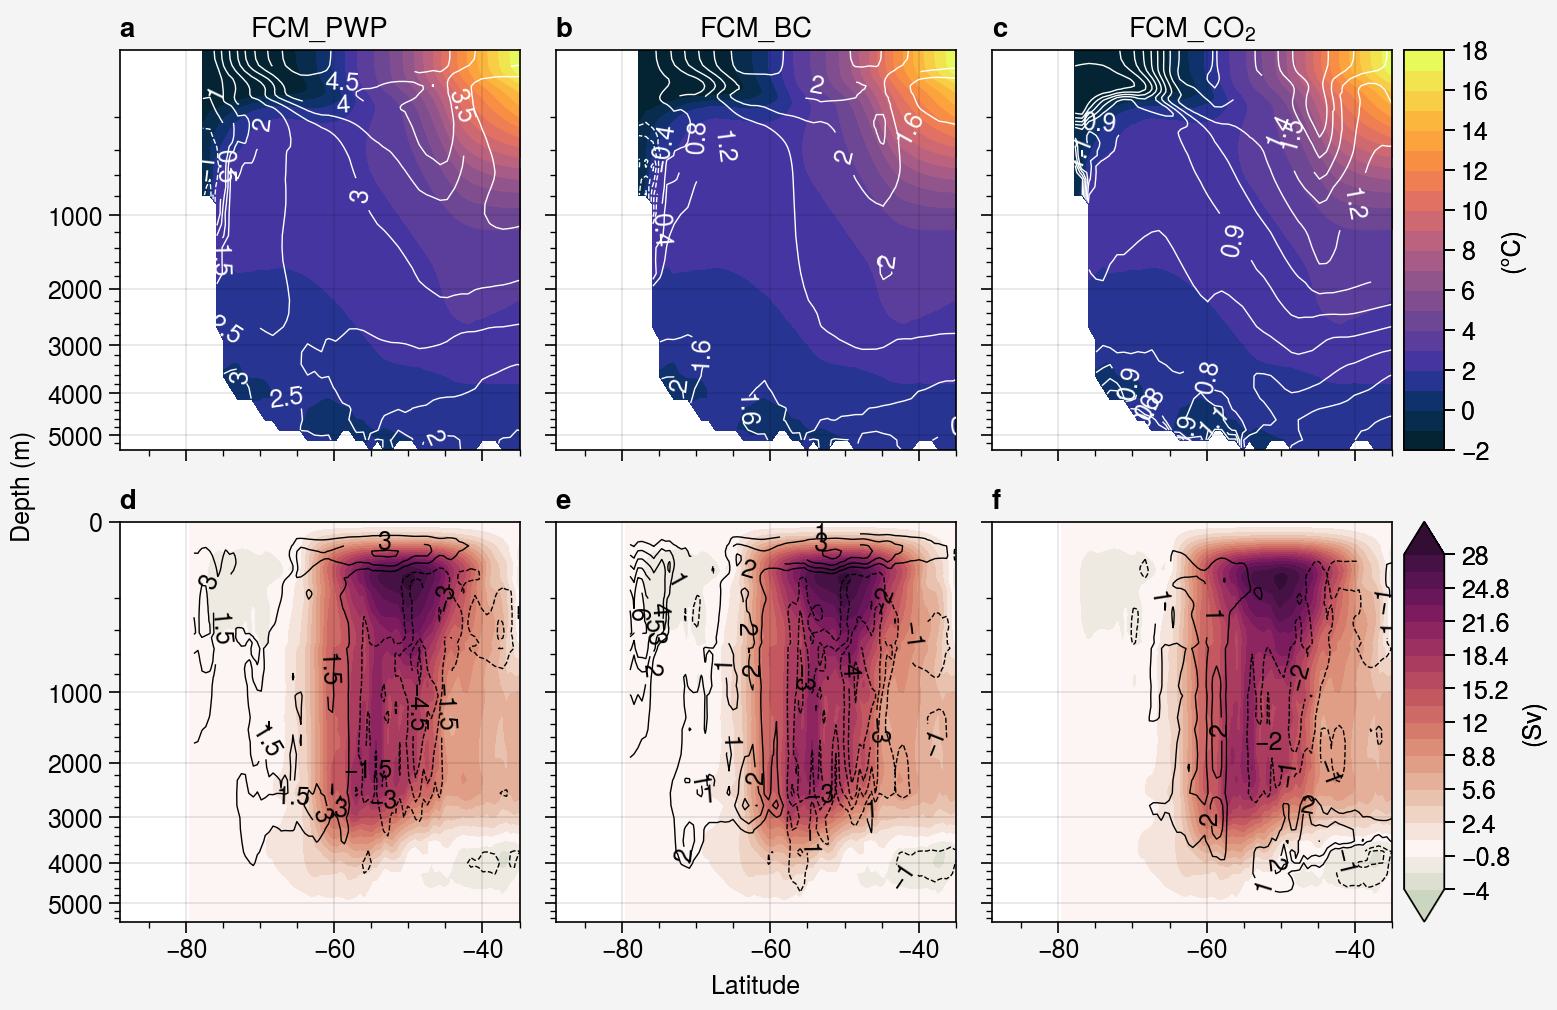

In [41]:
gs = pplt.GridSpec(ncols=3, nrows=2)
fig = pplt.figure(refwidth=2, refheight=2)

for i in range(6):
    ax = fig.add_subplot(gs[i])

axs = fig.subplotgrid

temps = [TEMP_plio, TEMP_plio_280, TEMP_400]
circs = [CIRC_plio, CIRC_plio_280, CIRC_400]
titles = ['FCM_PWP', 'FCM_BC', 'FCM_CO$_2$']

for i,ax in enumerate(axs[0:3]):
    cp1 = ax.contourf(lat_temp, depth_temp / 100, TEMP_pi, N=np.linspace(-2,18,21), cmap=cmaps['thermal'])
    ax.contour(lat_temp, depth_temp/100, temps[i], colors='white', N=25, lw=0.5,
              labels=True, precision=1, nozero=True) #labels_kw={'backgroundcolor':'black'})
    ax.format(title=titles[i])

for i,ax in enumerate(axs[3:5]):
    cp2 = ax.contourf(lat_pi, depth_pi / 100, MOC_pi, extend='both', N=np.linspace(-4,28,21), cmap=cmaps['curl'])
    ax.contour(lat_plio, depth_plio/100, circs[i], colors='black', N=15, lw=0.5,
              labels=True, precision=1, nozero=True)

axs[5].contourf(lat_pi, depth_pi / 100, MOC_pi, extend='both', N=np.linspace(-4,28,21), cmap=cmaps['curl'])
axs[5].contour(lat_pi, depth_pi/100, circs[2], colors='black', N=15, lw=0.5,
              labels=True, precision=1, nozero=True)

axs[5].colorbar(cp2, label='(Sv)')
axs[2].colorbar(cp1, label='(°C)')
axs[0].invert_yaxis()
axs[3].invert_yaxis()

for ax in axs:

    ax.format(yscale=('power', 0.5))
    #ax.format(xscale=('sine'))
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(-89,-35);
    
axs.format(abc=True)